# **Customer Churn Prediction**

## 1. Data Loading

In [76]:
!pip install xgboost

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

In [79]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
print(f"Row Count: {df.shape[0]}")
print(f"Column Count: {df.shape[1]}")

Row Count: 7043
Column Count: 21


In [81]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


## 2. Data Cleaning

- The "TotalCharges" column's data type is "object" and not a numeric type. It needs to be converted.
- The 'Churn' column is the target, so it needs to be encoded so it can be processed.

In [82]:
# Check for missing values
print(df.isnull().sum()) # No missing values found

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [83]:
# Converting TotalCharges data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [84]:
# Encode the churn label
# Use binary encoding since there's only 2 results (Yes/No)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [85]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [86]:
# Check for missing values
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [87]:
# TotalCharges now have NaN values
# We replace those with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## 3. Data Preprocessing

In [88]:
# Count churn count
churn_count = df['Churn'].value_counts()
print(churn_count)

Churn
0    5174
1    1869
Name: count, dtype: int64


The data is imbalanced, so we need to add new churn data to balance it. We will use **SMOTE (Synthetic Minority Over-sampling Technique)** to synthesize new data to balance both results.

In [89]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Encoding using Get Dummies
# CustomerID is dropped because it is completely useless here
df_encoded = pd.get_dummies(df.drop('customerID', axis=1), drop_first=True)

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Train-test split: 80/20
# Do this before SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Comparison
print(f"Original Training Size: {len(y_train)}")
print(f"New (SMOTE) Training Size: {len(y_train_resampled)}")

Original Training Size: 5634
New (SMOTE) Training Size: 8276


## 4. Training

In [90]:
# Use Random Forest for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [91]:
# Evaluate
predictions = rf_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.61      0.58      0.59       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409



## 5. Hyperparameter Tuning

Recall score for Class 1 is 0.58, that means it misses about 40% of the correctly churning out customers. The current training workflow needs to be improved.

The model won't be changed, however the Random Forest's hyperparameters will be tuned.

In [92]:
from sklearn.model_selection import GridSearchCV
# Use Grid Search to brute-force this and find the ideal parameter combination

# 1. Setup the parameter choices
param_grid = {
    'n_estimators': [50, 100, 200], # Amount of trees
    'max_depth': [10, 20, None], # Max tree size
    'min_samples_leaf': [1,2,4] # Minimum sample amount for a leaf
}

# 2. Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=1, verbose=2, scoring='recall')

# 3. Run the Grid Search
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..max_depth=10, min_samples_leaf=1, n_estimators=50; total time=   1.3s
[CV] END ..max_depth=10, min_samples_leaf=1, n_estimators=50; total time=   0.8s
[CV] END ..max_depth=10, min_samples_leaf=1, n_estimators=50; total time=   0.6s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   1.2s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   1.5s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   1.8s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=200; total time=   3.3s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=200; total time=   4.6s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=200; total time=   2.5s
[CV] END ..max_depth=10, min_samples_leaf=2, n_estimators=50; total time=   0.8s
[CV] END ..max_depth=10, min_samples_leaf=2, n_estimators=50; total time=   0.6s
[CV] END ..max_depth=10, min_samples_leaf=2, n_e

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=2)

In [93]:
# 4. Get the best parameters
best_rf = grid_search.best_estimator_
print(f"Best Parameters Found: {grid_search.best_params_}")

Best Parameters Found: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}


In [94]:
# 5. Evaluate with the new parameters
grid_predictions = best_rf.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1036
           1       0.59      0.71      0.64       373

    accuracy                           0.79      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.81      0.79      0.80      1409



New ideal parameters:
*   Max depth: 10
*   Min samples leaf: 1
*   N estimators: 200

Recall scores:
*   Previous score: 0.6
*   New score: 0.7

The model worked better with a max depth of 10, that means the model was overfitting without a maximum tree size.

## 6. Explanation

/tmp/ipython-input-3234606398.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


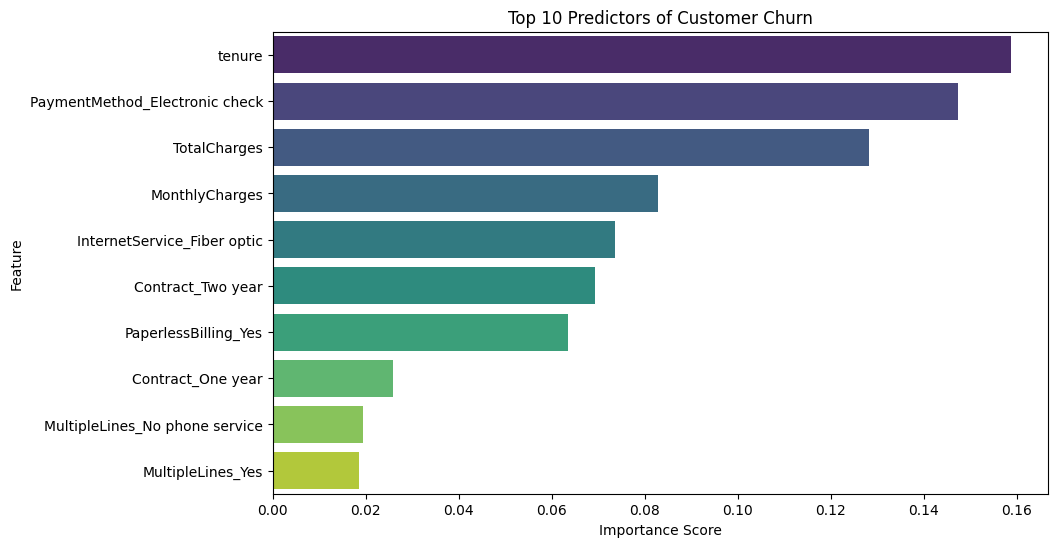

In [95]:
# 1. Get feature importances
importances = best_rf.feature_importances_

# 2. Get column names for labeling
feature_names = X.columns

# 3. Create new dataframe to show this data
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(10)

# 4. Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Top 10 Predictors of Customer Churn')
plt.xlabel('Importance Score')
plt.show()

**Top 5 important features:**
1.   Tenure (How many months the customer has stayed)
2.   Payment Method - Electronic Check (Customers who use electronic checks when paying)
3.   Total charges (Total amount of money paid by the customer)
4.   Monthly charges (Amount of money paid monthly by the customer)
5.   Internet Service - Fiber Optic (Customers who use fiber optic cables for their internet)

### **Summary**
1.   **Tenure**
     *   The #1 most important predictor for churn prediction.
     *   The first few months are the most volatile, with new customers being more likely to drop out. However, if they make it through that initial onboarding, they are more likely to stay for years.
     *   **Action**: Focus the retention budget and efforts on new users for the first 6 months.
2.   **PaymentMethod_Electronic check**
     *   This specific payment method has an influence over churn rate, so this is quite suspicious.
     *   Electronic checks usually requires the customer to log in and make the transfer themselves. They are constantly reminded of the price and are more likely to reconsider continued use. However, customers with automatic payment method (credit card) are less likely to churn since they rarely see the direct payment.
     *   **Action**: Encourage customers to switch over to automatic payment methods with discounts and other bonuses.
3.   **MonthlyCharges**
     *   Higher monthly chargers usually lead to higher churn.
     *   This indicates that customers aren't loyal to the brand, and are particularly sensitive towards value.
     *   **Action**: Identify high paying customers and offer them extra benefits that increased the perceived value of the service without lowering price.
4.   **TotalCharges**
     *   This works in opposition to MonthlyCharges. High TotalCharges usually means high Tenure.
     *   A customer who has paid a lot of money over a few years are historically stable. Even though their MonthlyCharges is high, their TotalCharges indicate that they are sticking.
     *   **Action**: Use to filter out volatile users. Those with high MonthlyCharges and TotalCharges are safe and do not warrant additional actions.
5.   **InternetService_Fiber optic**
     *   Despite being the best technology, customers are churning more compared to lower value services.
     *   This implies one of two things:
         1. The Fiber optic service is unreliable, leading to frustrated users.
         2. Competitors provide the same service for cheaper prices.
     * **Action**: This is a problem with the **Product** and not the **Marketing**. Fix the product's problems.



In [96]:
import joblib

# Save the model to a file
joblib.dump(best_rf, 'churn_model_rf.pkl')

print("Model saved successfully!")

Model saved successfully!
